IMDB reviews Sentiment Analysis

Εισαγωγή

Οι ταινίες (και οι σειρές) πάντα συνάρπαζαν τον πολύ κόσμο και θα συνεχίσουν να το κάνουν για πολύ καιρό ακόμα. Οι θεατές ενός έργου βρίσκουν την ανάγκη να μοιραστούν την εμπειρία τους από τη θέαση ενός έργου με άλλους υπό τη μορφή κριτικής αυτού που είδαν. Το δημοφιλέστερο μέσο για να το κάνουν είναι στις μέρες μας το IMDB, όπου υπάρχει πληθώρα διαθέσιμων κριτικών από επαγγελματίες αλλά και απλούς χρήστες του διαδικτύου. Η κατηγοριοποίηση αυτών των κριτικών σε καλή ή κακή θα βοηθούσε σε γρήγορα συμπεράσματα για την ποιότητα ενός έργου.

Οι αλγόριθμοι μηχανικής μάθησης μάς έχουν επιτρέψει να αναλύσουμε και να κατηγοριοποιήσουμε κείμενο, στην περίπτωσή μας μια κριτική, ανάλογα με το συναίσθημα που εκφέρουν χρησιμοποιώντας διάφορες πρακτικές επεξεργασίας φυσικής γλώσσας (Natural Language Processing – NLP). Παρά τις προκλήσεις που ανακύπτουν στη διαδικασία εξαγωγής συναισθήματος από κείμενο, οι αλγόριθμοι μηχανικής μάθησης συχνά καταφέρουν να ταξινομήσουν με μεγάλη ακρίβεια.

Η παρούσα ανάλυση θα εξετάσει διάφορες τεχνικές και μοντέλα για την ανάλυση των συναισθημάτων σε κριτικές στο IMDB και την ικανότητά των μοντέλων αυτών να εξάγουν ακριβή αποτελέσματα.


Libraries και Dataset 

Ορισμένα libraries που χρησιμοποιούνται ευρέως στην παρούσα ανάλυση αναφέρονται παρακάτω, καθώς και στο αρχείο Requirements.txt, το οποίο βρίσκεται στο github repository της ανάλυσης.

•	Pandas: Ένα library για την ανάλυση και τροποποίηση δεδομένων. Έχει δομές δεδομένων για την αποθήκευση μεγάλου όγκου πληροφορίας και αρκετά functions για την τροποποίηση των δεδομένων.

•	Numpy: Ένα library για αριθμητικούς υπολογισμούς. Περιέχει αρκετά functions για μαθηματικές πράξεις.

•	Sklearn ή Scikit-learn: Ένα library που περιέχει διάφορα functions για τεχνικές μηχανικής μάθησης, καθώς και πιο ειδικές βιβλιοθήκες για κάθε μοντέλο.

•	Matplotlib: Ένα library για οπτικοποίηση δεδομένων. Περιέχει πολλά functions για τη δημιουργία διαγραμμάτων.

•	Seaborn: Ακόμα ένα library για οπτικοποίηση δεδομένων που έχει βασιστεί στο matplotlib.

Το dataset που χρησιμοποιήθηκε στην ανάλυση προέρχεται από την ιστοσελίδα Kaggle (https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format) και βρίσκεται στο φάκελο “datasets” του repository.


In [22]:
import pandas as pd
import numpy as np
import os, warnings
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import DataConversionWarning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

warnings.filterwarnings(action='ignore', category=DataConversionWarning) # ignore some Scikit Learn warnings
pd.set_option("display.max_columns", None) # enables the printing of all columns

raw_df = pd.read_csv('../datasets/IMDB-reviews.csv')

Διαστάσεις του Dataframe

Τα δεδομένα από το dataset που χρησιμοποιούμε έχουν εξαχθεί σε μορφή dataframe και όπως φαίνεται παρακάτω είναι συνολικά 40.000 κριτικές με δύο στήλες κάθε καταχώρηση.

In [23]:
print(f'Length of df {len(raw_df)}, number of columns {len(raw_df.columns)}, dimensions {raw_df.shape}, number of elements {raw_df.size}')

Length of df 40000, number of columns 2, dimensions (40000, 2), number of elements 80000


Επισκόπηση/Γενικά Στοιχεία για το Dataframe

Με το function “info” της Pandas βλέπουμε πιο αναλυτικά τα δεδομένα για το Dataframe που χρησιμοποιούμε. Όπως διαπιστώνουμε ακολούθως έχουμε 2 στήλες στο dataframe, οι οποίες έχουν τίτλους ‘text’ και ‘label’, αντίστοιχα. Μας πληροφορεί ακόμη ότι ο τύπος των δεδομένων της κάθε στήλης είναι για τις 2 παραπάνω στήλες είναι ‘object’ και ‘int64’. Στην pandas τα strings λογίζονται ως objects. Φαίνεται επίσης ποιες τιμές δεν είναι null. Τέλος αναφέρεται ο όγκος μνήμης που χρησιμοποιεί το dataset.



In [24]:
raw_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 52.6 MB


Με το function “describe” συνήθως μπορούμε να εξάγουμε ορισμένα ενδιαφέροντα δεδομένα για το dataset που έχουμε, ωστόσο είναι περισσότερο χρήσιμο για datasets με int ή float και όχι τόσο για datasets με strings, όπως το δικό μας. Και πάλι όμως μπορούμς να πάρουμε μια γνώση για τις μοναδικές τιμές ή καλύτερα για το αν έχουμε διπλοκαταχωρήσεις στα δεδομένα μας.


In [25]:
raw_df.describe(include='all')

,text,label
count,40000,40000.000000
unique,39723,NaN
top,"Hilarious, clean, light-hearted, and quote-wor...",NaN
freq,4,NaN
mean,NaN,0.499525
std,NaN,0.500006
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


Το function "head" αυτό της Pandas μάς επιστρέφει τις 5 πρώτες γραμμές του dataset έτσι ώστε να έχουμε μία καλύτερη εικόνα των δεδομένων κάθε στήλης.

In [26]:
raw_df.head(5)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


Ελλιπή Δεδομένα

Ακολουθεί η διαδικασία ελέγχου για ελλιπή δεδομένα. Από τις πρώτες και συμαντικότερες διαδικασίες ελέγχου πριν την εκπαίδευση ενός μοντέλου. Για να αντιμετωπίσουμε την έλλειψη δεδομένων έχουμε δύο επιλογές:

•	Να αφαιρέσουμε τη γραμμή στην οποία λείπει μια τιμή

•	Να προσπαθήσουμε να «μαντέψουμε» ποια θα ήταν τα δεδομένα που λείπουν (data imputation)

Αρχικά με το function "isna" της pandas εξετάζουμε αν έχουμε πράγματι ελλιπή δεδομένα. Το function αυτό επιστρέφει ένα πίνακα με true/false ανάλογα αν έχουμε value σε αυτό το column, οπότε εδώ προσθέτουμε και ένα sum στο τέλος για να δούμε πόσα λείπουν σε κάθε column. Το μηδέν που μας επιστρέφεται και για τις δύο στήλες των δεδομένων μας, μας διαβεβαιώνει ότι σε αυτό το dataset δεν υπαρχουν ελλέιψεις και μπορούμε να συνεχίσουμε.


In [27]:
print(raw_df.isna().sum())

text     0
label    0
dtype: int64


Αφαίρεση Διπλοτύπων Γραμμών

Επόμενος έλεγχος είναι αυτός της αφαίρεσης επαναλαμβανόμενων γραμμών. Αναλόγως πόσο αυτοματοποιημένα έχει δημιουργθεί ένα dataset υπάρχει συμαντική πιθανότητα να έχουμε διπλότυπες καταχωρήσεις (δηλαδή να έχουμε ακριβώς την ίδια γραμμή 2 ή περισσότερες φορές). Σε αυτή την περίπτωση χρησιμοποιούμε το function “drop_duplicates” της pandas (με το inplace=True αλλάζουμε απευθείας το dataset αφαιρώντας τις διπλότυπες γραμμές).

Γνωρίζαμε από προηγούμενο στάδιο την ύπαρξη επαναλήψεων και μαθαίνουμε ότι  εγγραφές διαγράφηκαν από το dataset.


In [28]:
df_size = raw_df.shape[0]
raw_df.drop_duplicates(keep=False, inplace=True)
df_size_dup = raw_df.shape[0]
print(f'Duplicate Rows Deleted {df_size - df_size_dup}, Old size: {df_size}, New size: {df_size_dup}')

Duplicate Rows Deleted 546, Old size: 40000, New size: 39454


Εξέταση του Αριθμού των Review Κάθε Κλάσης

Στην περίπτωσή μας οι κλάσεις που εξετάζουμε είναι καλή ή κακή κριτική, επομένως θα έχουμε 2 διαφορετικές κλάσεις. Με το function “unique” της pandas βλέπουμε πόσα είναι τα διαφορετικά values στη στήλη 'label' και ακολούθως με την ‘value_counts’ βλέπουμε πόσες κριτικές αντιστοιχούν στην κάθε κατηγορία συνολικά.

Το βέλτιστο είναι να έχουμε παρόμοιο αριθμό κριτικών σε καθε κλάση, έτσι ώστε να γίνεται καλύτερο classification και να μην υπάρχει bias. Εξ αρχής το dataset είχε απόλυτα ισσοροπημένο αριθμό θετικών και αρνητικών κριτικών και παρά την αφαίρεση των διπλότυπων εξακολουθεί να είναι πρακτικά μοιρασμένο στις δύο κλάσεις. Προφανώς παίζει ρόλο ότι οι επαναλαβανόμενες εγγραφές που είχε αρχικά ήταν λίγες σε αριθμό σε σχέσ με το σύνολο αυτών.


In [29]:
print("Sentiment Label has", len(raw_df['label'].unique()),"unique values.")
print(raw_df['label'].value_counts())

Sentiment Label has 2 unique values.
label
1    19840
0    19614
Name: count, dtype: int64


Αφαίρεση Outliers από το Dataset

Στη συνέχεια θα ελέγξουμε την ύπαρξη κριτικών που είναι πολύ μικρές για να τις αξιολογήσουμε. Θεωρούμε ότι κείμενο με αριθμό χαρακτήρων μικρότερο του 30 δεν αποτελεί πραγματικά κριτική και επομένως το αφαιρούμε. Για να επιτύχουμε τον παραπάνω στόχο αρχικά δημιουργούμε μία νέα στήλη που περιέχει τον αριθμό των χαρακτήρων σε κάθε review (από τη στήλη ‘text’).
ξανά με το ‘describe’ εξάγουμε κάποια ενδιαφέροντα δεδομένα, όπως για παράδειγμα το μέσο μήκος των reviews.


In [30]:
raw_df['content_char_count'] = raw_df['text'].str.len()

raw_df['content_char_count'].describe()

count    39454.000000
mean      1311.999214
std        990.157400
min         32.000000
25%        699.000000
50%        974.000000
75%       1598.000000
max      13704.000000
Name: content_char_count, dtype: float64

Κάνουμε και τον έλεγχο για κριτικές πολύ μικρές να τις αξιολογήσουμε και σε αυτή την περίπτωση δεν αφαιρούνται δεδομένα.

In [31]:
old_shape = raw_df.shape[0]
raw_df = raw_df[raw_df['content_char_count'] >= 30]
print(f'Rows Removed for having low number of characters: {old_shape-raw_df.shape[0]}')

Rows Removed for having low number of characters: 0


Με το seaborn μπορούμε να κάνουμε μία καλή οπτικοποίηση των δεδομένων σχετικά με το μήκος των reviews

c:\Users\superuser\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\superuser\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\superuser\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


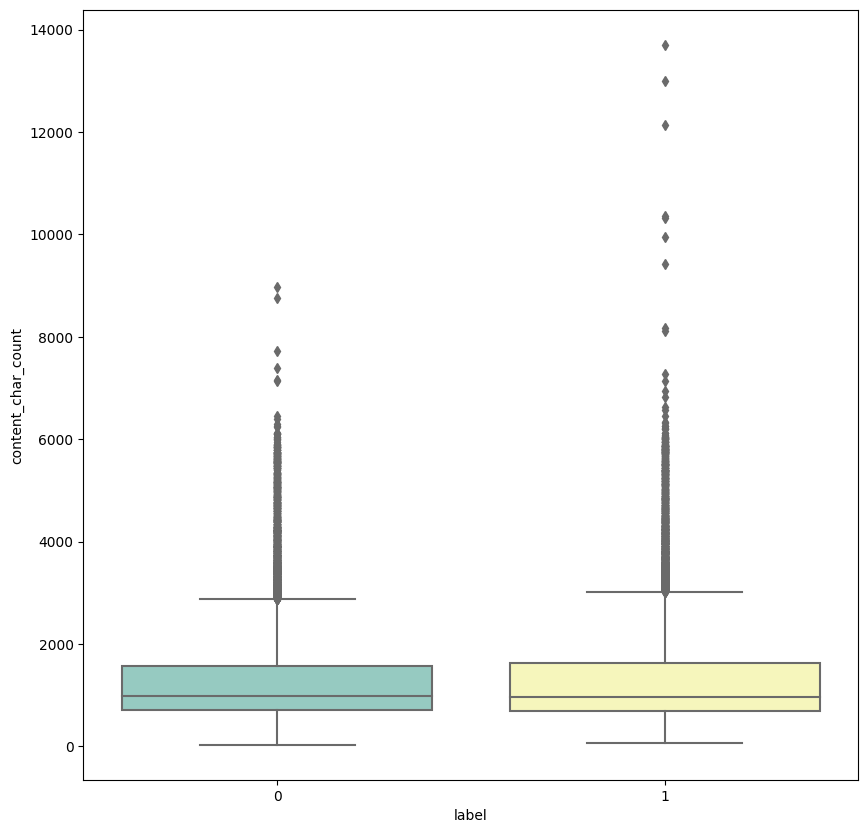

In [32]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="label",y="content_char_count",data=raw_df, palette="Set3")
plt.show()

Δημιουργία του Feature Matrix

Feature Matrix

Η προσέγγιση που χρησιμοποιούμε για τη δημιουργία του feature matrix είναι το Bag of Words (BoW). Πρακτικά, το TfidVectorizer της sklearn δημιουργεί ένα μεγάλο feature matrix. Στον πίνακα αυτό πρακτικά έχουμε κάθε review στις γραμμές και βάζουμε ‘1’ αν περιέχει την κάθε λέξη στις στήλες.

Η TfidfVectorizer εκτελεί επίσης και άλλες λειτουργίες μέσω των parameters στην κλήση της, όπως για παράδειγμα να μετατρέψει όλα τα γράμματα από κεφαλαία σε μικρά (‘lowercase’: True) και να αφαιρέσει τα σημεία στίξης (‘stopwords’).

Με το ‘ngram_range’ επιλέγουμε αν θα υπάρχουν και δύο συνεχόμενες λέξεις στα features (εδώ έχουμε επιλέξει ναι), καθώς και το μέγιστο αριθμό των features (έχουμε επιλέξει 1200).

Είναι σημαντικό να σημειωθεί ότι το TfidfVectorizer εφαρμόζει και το νόμο του Zipf, δηλαδή δίνει λιγότερη αξία στις λέξεις που επαναλαμβάνονται πολύ και μεγαλύτερη σε λέξεις με λίγες εμφανίσεις.


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate

import warnings
warnings.filterwarnings('always')

final_vectorizer_params = {
    "smooth_idf": True,
    "analyzer": 'word',
    "stop_words": 'english',
    "lowercase": True,
    "ngram_range": (1,2),
    "max_features": 1200,
}

tfidf_vectorizer = TfidfVectorizer(**final_vectorizer_params)

train_df = raw_df.copy()
print(train_df.shape[0])

X = train_df['text'].copy()
y = train_df['label'].copy()
X, X_val, y, y_val = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
X = tfidf_vectorizer.fit_transform(X)
X_val = tfidf_vectorizer.transform(X_val)
print(X.shape[0])
print(X_val.shape[0])

39454
33535
5919


Helper Functions

Πριν ξεκινήσω την εφαρμογή των διαφόρων μοντέλων για την ανάλυση των δεδομένων, δημιουργούμε τα παρακάτω helper functions που θα βοηθήσουν σε αυτή τη διαδικασία.

get_confusion_matrix. Το function αυτό επιστρέφει το confusion matrix από το οποίο φαίνονται τα σωστά και τα λανθασμένα predictions του classifier που χρησιμοποιήθηκε.

get_roc_auc. Το function αυτό εμφανίζει την roc καμπύλη και την auc τιμή με βάση τα predictions του classifier που χρησιμοποιήθηκε.

hyperparameter_tuning. Το function αυτό ελέγχει διάφορα parameters που έχουμε δώσει για το μοντέλο που θέλουμε να εξετάσουμε. Στη συνέχεια χρησιμοποιεί την κλάση GridSeachCV της scikit-learn για να μας επιστρέψει τις καλύτερες τιμές για τα params από αυτές που έχουμε δώσει.

model_validation. Cross validation του μοντέλου και εξαγωγή δεδομένων για accuracy, precision, recall και macro-f1.  Η τιμή 5 του cv ουσιαστικά δείχνει ότι γίνεται cross validation με 5 folds (4 training – 1 test).

train_model. Χωρίζει τα δεδομένα σε train και test (3:1) και κάνει το τελικό training του μοντέλου με βάση τα ιδανικά params που υπολογίσαμε στις προηγούμενες συναρτήσεις.


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

def get_confusion_matrix(y, y_p):
    cm = confusion_matrix(y, y_p)
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(raw_df['label'].sort_values().unique()))
    disp.plot(ax=ax)
    plt.show()
    return

def get_roc_auc(y, y_p):
    plt.figure(figsize=(8,4))
    fpr,tpr,threshold = roc_curve(y,y_p)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return


def hyperparameter_tuning(model, params):
    search = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=2)
    search.fit(X, y)
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
    print("\n The best score across ALL searched params:\n",search.best_score_)
    print("\n The best parameters across ALL searched params:\n",search.best_params_)
    return search.best_estimator_

def model_validation(model):
    results = cross_validate(model, X, y, cv=5, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
    return results
                              
def train_model(model):
    res = model.fit(X, y)
    predicted = model.predict(X_val)
    result = np.mean(predicted == y_val)
    c_report = classification_report(y_val,predicted)
    predicted_train = model.predict(X)
    print("Accuracy Score on training set is", round(np.mean(predicted_train == y)*100, 2), "%")
    print("Accuracy Score on validation set is", round(result*100, 2), "%")
    get_confusion_matrix(y_val, predicted)
    get_roc_auc(y_val, predicted)
    return res, c_report

Classification Models

SVM

Το πρώτο μοντέλο που θα εξετάσουμε είναι το SVM. Το μοντέλο αυτό πρακτικά προσπαθεί να διαχωρίσει τις διάφορες κλάσεις με μία γραμμή (ή επίπεδο). Η παραπάνω γραμμή μεγιστοποιεί τις αποστάσεις στα κοντινότερα σημεία μεταξύ διαφορετικών κλάσεων και μπορεί έτσι να εκτιμήσει σε ποια κλάση θα ανήκει ένα νέο δεδομένο που θα δώσουμε.

Η σημαντικότερη παράμετρος σε αυτό το μοντέλο είναι το ‘C’, το οποίο πρακτικά αντικατοπτρίζει την «ανοχή» του μοντέλου σε misclassifications στο training set. Συχνά, όταν επιτρέπουμε στο C να έχει χαμηλές τιμές (δηλαδή να επιτρέπει misclassifications στο training set) επιτυγχάνουμε καλύτερο generalization. Στο συγκεκριμένο παράδειγμα εξετάζουμε τις τιμές του C 0.4, 0.6, 0.8, 1, 1.2, 1.4 και 1.6.

Μία άλλη παράμετρος που εξετάζουμε στο hyperparameter tuning είναι το kernel που παίρνει τιμές ‘linear’ ή ‘poly’. Αυτό σημαίνει ότι εξετάζουμε αν μπορούμε να διαχωρίσουμε γραμμικά ή πολυωνυμικά (υψώνουμε τα δεδομένα σε κάποια δύναμη).

Στα αποτελέσματα βλέπουμε τα καλύτερα parameters από αυτά που ελέγξαμε και τιμές accuracy σε training και validation. Ακολουθεί το confusion matrix και τους πίνακες με τα precision, recall και f1-score κάθε κλάσης. Τέλος βλέπουμε την roc καμπύλη και την auc τιμή για την τελική έκδοση του μοντέλου.

Fitting 2 folds for each of 14 candidates, totalling 28 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=0.4, kernel='linear')

 The best score across ALL searched params:
 0.8584464107181637

 The best parameters across ALL searched params:
 {'C': 0.4, 'kernel': 'linear'}
Cross Validation results {'fit_time': array([153.60596633, 162.22533774, 144.73186207, 140.28629112,
       145.09091067]), 'score_time': array([28.90309954, 29.67492986, 27.92821097, 27.60153913, 27.35499907]), 'test_accuracy': array([0.86357537, 0.86014612, 0.86551364, 0.85671686, 0.86432086]), 'test_precision_macro': array([0.86396226, 0.86037256, 0.86604872, 0.85731303, 0.86457189]), 'test_recall_macro': array([0.86350009, 0.860088  , 0.86543119, 0.85662844, 0.86426417]), 'test_f1_macro': array([0.86351925, 0.8601078 , 0.86544362, 0.85663322, 0.86428233])}
Accuracy Score on training set is 87.79 %
Accuracy Score on validation set is 86.5 %


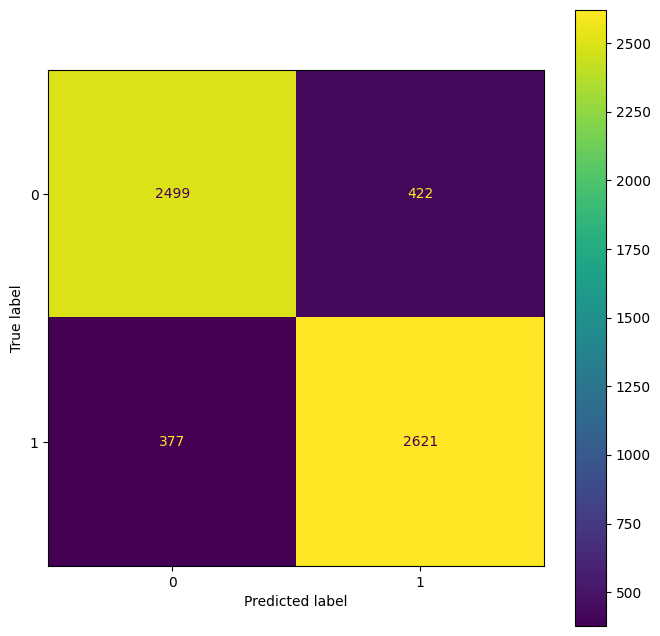

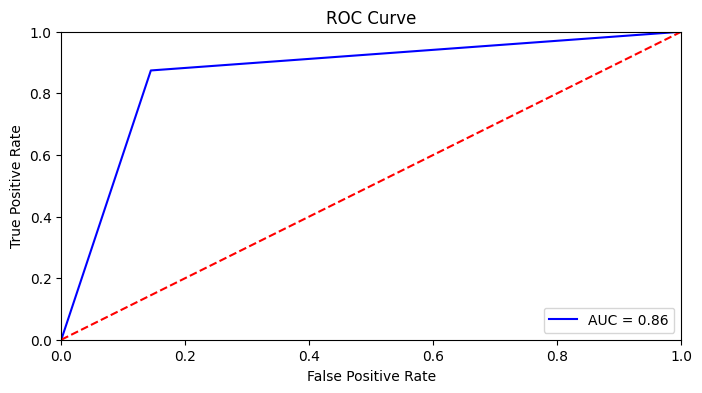

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2921
           1       0.86      0.87      0.87      2998

    accuracy                           0.87      5919
   macro avg       0.87      0.86      0.86      5919
weighted avg       0.87      0.87      0.86      5919



In [35]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {
    "kernel": ['linear', 'poly'],
    "C": [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
}
best_model = hyperparameter_tuning(svc, param_grid)
results = model_validation(best_model)
print("Cross Validation results", results)
final_model, report = train_model(best_model)
print(report)

kNN

Το επόμενο μοντέλο που θα εξετάσουμε είναι το kNN (k-nearest neighbors) . Το μοντέλο αυτό εξετάζει σε ποια κλάση ανήκει το review ανάλογα με τα «γειτονικά» του data points. Για παράδειγμα αν εξετάζουμε 5 γειτονικά data points και έχουμε 3 θετικές και 2 αρνητικές κριτικές, η κριτική θα ταξινομηθεί ως θετική.

Εδώ προφανώς έχει σημασία πόσα είναι τα γειτονικά data points που θα εξετάσουμε καθώς μία μικρότερη τιμή του ‘n_neighbors’ μπορεί να μας επιτρέψει να αντιληφθούμε πιο σύνθετες συσχετίσεις στα δεδομένα, ενώ μία μεγαλύτερη τιμή μπορεί να δημιουργήσει μεν ένα ισχυρότερο μοντέλο που δεν κάνει overfit, αλλά δεν αντιλαμβάνεται λεπτομέρειες στη σύνδεση των δεδομένων.

Εδώ δοκιμάσαμε τιμές για το ‘n_neighbors’ 3, 7, 11 και 15. Στα αποτελέσματα βλέπουμε τα καλύτερα parameters από αυτά που ελέγξαμε και τιμές accuracy σε training και validation. Ακολουθεί το confusion matrix και τους πίνακες με τα precision, recall και f1-score κάθε κλάσης. Τέλος βλέπουμε την roc καμπύλη και την auc τιμή για την τελική έκδοση του μοντέλου.


Fitting 2 folds for each of 4 candidates, totalling 8 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(n_neighbors=15)

 The best score across ALL searched params:
 0.731146584394009

 The best parameters across ALL searched params:
 {'n_neighbors': 15}
Cross Validation results {'fit_time': array([0.0150125 , 0.01563025, 0.01564837, 0.01563501, 0.01711416]), 'score_time': array([48.08908486, 52.11715698, 48.97578287, 49.0642879 , 52.23316097]), 'test_accuracy': array([0.7375876 , 0.73072909, 0.71790666, 0.73162368, 0.73878038]), 'test_precision_macro': array([0.73842366, 0.73212734, 0.71891377, 0.73600425, 0.73878341]), 'test_recall_macro': array([0.73744416, 0.73054278, 0.71804709, 0.73132339, 0.7387626 ]), 'test_f1_macro': array([0.73727595, 0.73021422, 0.71766308, 0.73020121, 0.73876644])}
Accuracy Score on training set is 78.95 %
Accuracy Score on validation set is 74.13 %


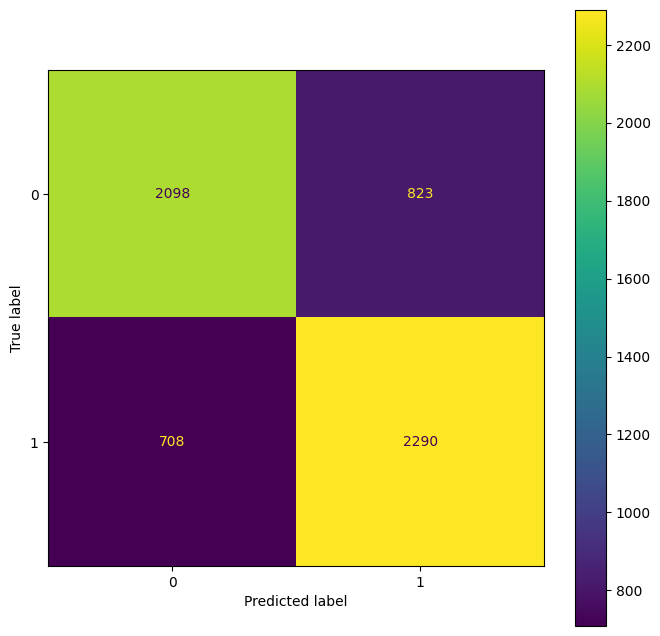

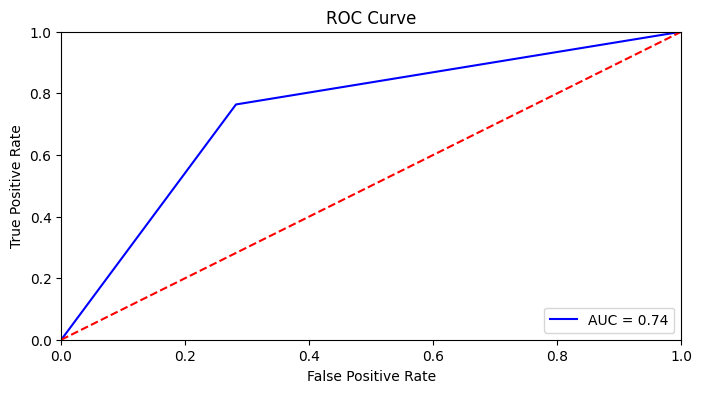

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      2921
           1       0.74      0.76      0.75      2998

    accuracy                           0.74      5919
   macro avg       0.74      0.74      0.74      5919
weighted avg       0.74      0.74      0.74      5919



In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 7, 11, 15]
}
best_model = hyperparameter_tuning(knn, param_grid)
results = model_validation(best_model)
print("Cross Validation results", results)
final_model, report = train_model(best_model)
print(report)

Decision Trees

Το επόμενο μοντέλο που θα εξετάσουμε είναι τα Decision Trees ή Δέντρα Απόφασης. Εδώ το σημαντικότερο param είναι το ‘max depth’. Γενικά όσο μεγαλύτερο είναι το max depth τόσο πιο πολύ ανεβαίνει το accuracy του μοντέλου για το dataset, ωστόσο υπάρχει κίνδυνος για overfit.

Άλλες παράμετροι είναι οι ‘min samples split’ που σημαίνει μέχρι ποιο αριθμό θα συνεχίσει να κάνει split τα κλαδιά του δέντρου (το default είναι 1). Όσο μικρότερο είναι το value αυτής της παραμέτρου τόσο αυξάνεται ο κίνδυνος overfit.

Μία άλλη παράμετρος είναι η ‘min samples leaf’. Οι μικρές τιμές σε αυτό το metric αυξάνουν την πιθανότητα overfit, ενώ σε μεγάλες τιμές υπάρχει πιθανότητα underfit.

Εδώ δοκιμάσαμε τιμές για το max_depth 50, 100 και 250, για το min_samples_split 100, 250 και 500 και για το min_samples_leaf 50, 100 και 250. Στα αποτελέσματα βλέπουμε τα καλύτερα parameters από αυτά που ελέγξαμε και τιμές accuracy σε training και validation. Ακολουθεί το confusion matrix και τους πίνακες με τα precision, recall και f1-score κάθε κλάσης. Τέλος βλέπουμε την roc καμπύλη και την auc τιμή για την τελική έκδοση του μοντέλου.


Fitting 2 folds for each of 27 candidates, totalling 54 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=50,
                       min_samples_split=500)

 The best score across ALL searched params:
 0.7479347165227543

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 50, 'min_samples_split': 500, 'splitter': 'best'}
Cross Validation results {'fit_time': array([4.91014171, 4.90037489, 4.82214785, 4.62255621, 4.77885675]), 'score_time': array([0.01008415, 0.00897861, 0.        , 0.00896215, 0.        ]), 'test_accuracy': array([0.7587595 , 0.76129417, 0.75413747, 0.74772626, 0.76144327]), 'test_precision_macro': array([0.75877579, 0.76131335, 0.75414673, 0.74774681, 0.76145291]), 'test_recall_macro': array([0.75873368, 0.76131181, 0.75414899, 0.74769962, 0.76142334]), 'test_f1_macro': array([0.75873955, 0.76129415, 0.

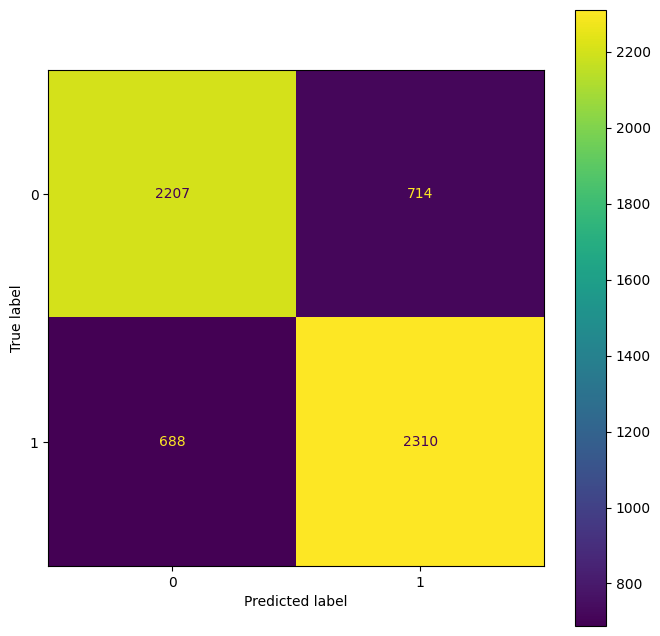

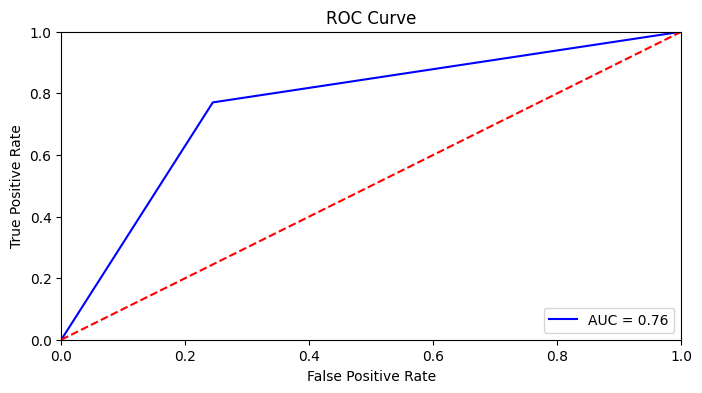

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2921
           1       0.76      0.77      0.77      2998

    accuracy                           0.76      5919
   macro avg       0.76      0.76      0.76      5919
weighted avg       0.76      0.76      0.76      5919



In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

param_grid = {
    "splitter": ['best'],
    "criterion": ['entropy'],
    "min_samples_split": [100, 250, 500],
    "min_samples_leaf": [50, 100, 250],
    "max_depth": [50, 100, 250]
}
best_model = hyperparameter_tuning(dtree, param_grid)
results = model_validation(best_model)
print("Cross Validation results", results)
final_model, report = train_model(best_model)
print(report)

Random Forest

Το επόμενο μοντέλο είναι το Random Forest. Το μοντέλο αυτό δημιουργεί πολλά μικρά decision trees και ακολούθως επιλέγει τυχαία μερικά από αυτά και βάσει αυτών δίνει ένα prediction για την κλάση.

Ο αλγόριθμος λέγεται “Random” Forest γιατί υπάρχει τυχαιότητα τόσο στην επιλογή των features που χρησιμοποιούνται για τη δημιουργία των decision trees όσο και στο κομμάτι του dataset που βασίζεται το decision tree.

Τα 2 σημαντικότερα params για αυτό το μοντέλο είναι το ‘n_estimators’ που βασικά αναφέρεται στον αριθμό των δέντρων που χρησιμοποιούμε. Γενικά, όσο μεγαλύτερος είναι αυτός ο αριθμός τόσο πιο ακριβές θα είναι το μοντέλο.

Ένα άλλο σημαντικό metric είναι το ‘max_depth’, το οποίο αναφέρεται στο μέγιστο βάθος που μπορεί να φτάσει το κάθε δέντρο. Όπως ισχύει και με τα decision trees, όσο πιο μεγάλο είναι το max_depth τόσο περισσότερο αυξάνεται ο κίνδυνος overfit.

Δοκιμάσαμε τιμές 100, 250 και 500 για το n_estimators και 10, 20, 50 για το max_depth. Στα αποτελέσματα βλέπουμε τα καλύτερα parameters από αυτά που ελέγξαμε και τιμές accuracy σε training και validation. Ακολουθεί το confusion matrix και τους πίνακες με τα precision, recall και f1-score κάθε κλάσης.  Τέλος βλέπουμε την roc καμπύλη και την auc τιμή για την τελική έκδοση του μοντέλου.


Fitting 2 folds for each of 81 candidates, totalling 162 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=4,
                       n_estimators=500)

 The best score across ALL searched params:
 0.8324435971074361

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
Cross Validation results {'fit_time': array([267.37589669, 291.57282758, 272.4001677 , 269.53016067,
       297.50183725]), 'score_time': array([0.6438992 , 0.63325572, 0.69294596, 0.68307328, 1.37001038]), 'test_accuracy': array([0.83390488, 0.8324139 , 0.83077382, 0.82913374, 0.83778142]), 'test_precision_macro': array([0.83495281, 0.83322512, 0.83179732, 0.83009734, 0.83831641]), 'test_recall_macro': array([0.83377452, 0.83229867, 0.83065268, 0.82901579, 0.83769458]), 'test_f1_macro': array([0.83373402, 0.8

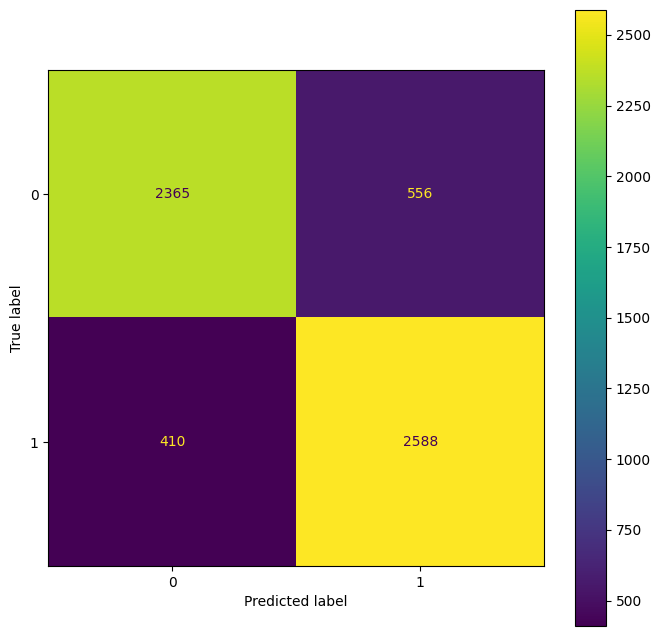

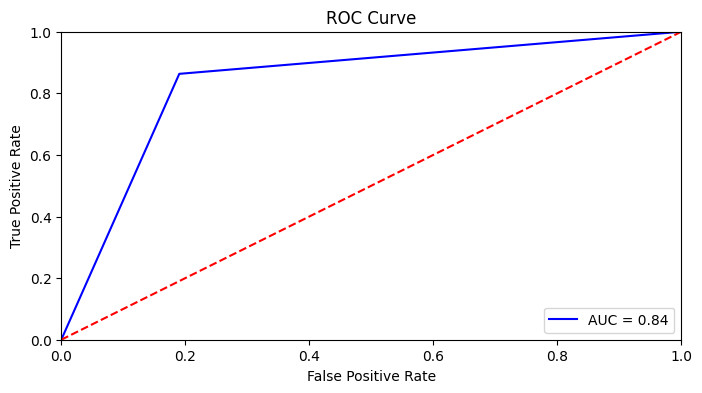

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2921
           1       0.82      0.86      0.84      2998

    accuracy                           0.84      5919
   macro avg       0.84      0.84      0.84      5919
weighted avg       0.84      0.84      0.84      5919



In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 250, 500],
    "criterion": ['entropy'],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 5],
    "max_depth": [10, 20, 50]
}
best_model = hyperparameter_tuning(rf, param_grid)
results = model_validation(best_model)
print("Cross Validation results", results)
final_model, report = train_model(best_model)
print(report)

AdaBoost

To AdaBoost θα μπορούσαμε να πούμε ότι χρησιμοποιεί αρκετούς «κακούς» classifiers οι οποίοι λέγονται estimator για να δημιουργήσει έναν ισχυρότερο classifier. Σε κάθε γύρο, το AdaBoost δίνει μεγαλύτερη βαρύτητα στα samples που δεν έγιναν classify σωστά στους προηγούμενους γύρους από τους estimators. Η διαδικασία αυτή επαναλαμβάνεται αρκετές φορές μέχρι να αναπτυχθεί ένας classifier που μπορεί να διαχωρίσει καλά τις κλάσεις.

Μία διαφορά του Adaboost από το Random Forest είναι ότι για παράδειγμα στο Random Forest όλα τα Decision Trees έχουν την ίδια βαρύτητα κάτι που δεν ισχύει για τους estimators του Adaboost, καθένας από τους οποίους έχει διαφορετική βαρύτητα.

Τα params που πρέπει να εξεταστούν σε αυτό το μοντέλο είναι το ‘n_estimators’ που αναφέρεται στον αριθμό των estimators και το ‘learning_rate’ που επηρεάζει το βάρος του κάθε estimator. Στα αποτελέσματα βλέπουμε τα καλύτερα parameters από αυτά που ελέγξαμε και τιμές accuracy σε training και validation. Ακολουθεί το confusion matrix και τους πίνακες με τα precision, recall και f1-score κάθε κλάσης. Τέλος βλέπουμε την roc καμπύλη και την auc τιμή για την τελική έκδοση του μοντέλου.

Fitting 2 folds for each of 18 candidates, totalling 36 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostClassifier(learning_rate=0.5, n_estimators=400)

 The best score across ALL searched params:
 0.8455643382988987

 The best parameters across ALL searched params:
 {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 400}
Cross Validation results {'fit_time': array([159.35099483, 148.79635549, 147.22981191, 147.46076083,
       149.01338744]), 'score_time': array([0.71706271, 0.71687484, 0.70030141, 0.70251393, 0.71685672]), 'test_accuracy': array([0.85075294, 0.85179663, 0.85194573, 0.84777099, 0.8540331 ]), 'test_precision_macro': array([0.85135689, 0.85216146, 0.85316408, 0.84859222, 0.85421784]), 'test_recall_macro': array([0.85065672, 0.85172179, 0.85181854, 0.84766563, 0.85398331]), 'test_f1_macro': array([0.85066146, 0.85173656, 0.85178334, 0.84765128, 0.85399933])}
Accuracy Score on training set is 86.72 %
Accuracy Score on 

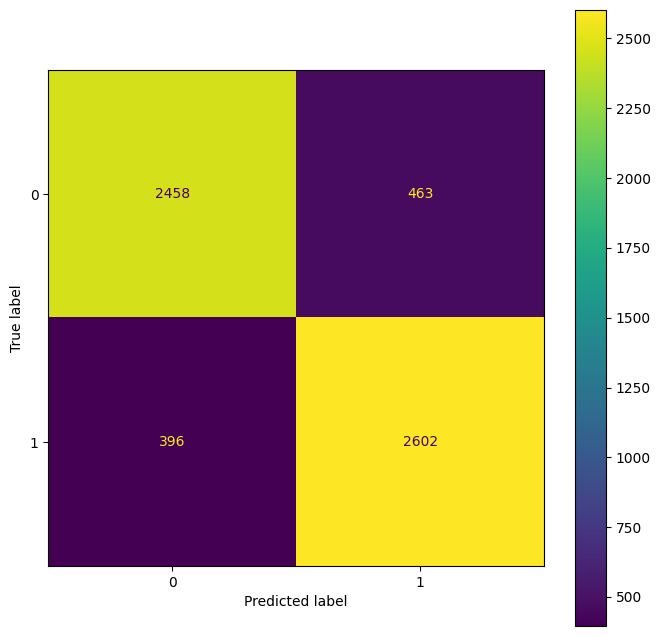

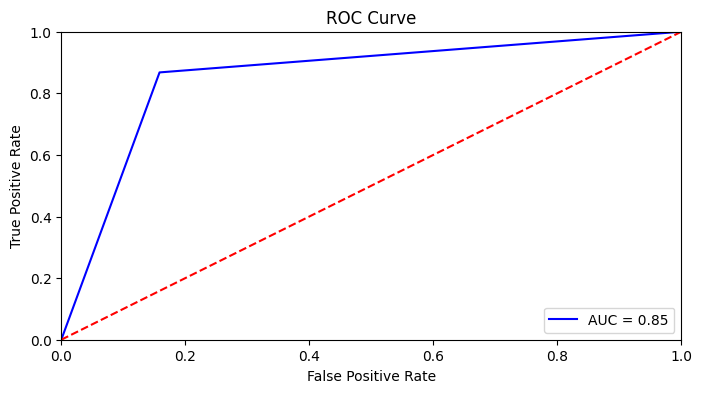

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2921
           1       0.85      0.87      0.86      2998

    accuracy                           0.85      5919
   macro avg       0.86      0.85      0.85      5919
weighted avg       0.86      0.85      0.85      5919



In [39]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()

param_grid = {
    "n_estimators": [100, 250, 400],
    "learning_rate": [0.1, 0.5, 1.0],
    "algorithm": ['SAMME', 'SAMME.R']
}
best_model = hyperparameter_tuning(ab, param_grid)
results = model_validation(best_model)
print("Cross Validation results", results)
final_model, report = train_model(best_model)
print(report)

Gaussian Naive Bayes

To naive bayes classifier ήταν λίγο διαφορετικό από τα προηγούμενα μοντέλα καθώς έπρεπε να κάνω μερικές τροποποιήσεις στο dataset προκειμένου να λειτουργήσει σωστά. Ο λόγος ήταν ότι καθώς το dataset είναι αρκετά μεγάλο, υπήρχαν αρκετά μηδενικά και επομένως μου έβγαινε συνεχώς error ότι τα δεδομένα είναι ‘too sparse’.

Για την αντιμετώπιση του παραπάνω προβλήματος χρησιμοποίησα την κλάση TruncatedSVD του sklearn έτσι ώστε να μειώσω τα dimensions από 1200 σε 200.
Στα αποτελέσματα βλέπουμε τα καλύτερα parameters από αυτά που ελέγξαμε και τιμές accuracy σε training και validation. Ακολουθεί το confusion matrix και τους πίνακες με τα precision, recall και f1-score κάθε κλάσης.  Τέλος βλέπουμε την roc καμπύλη και την auc τιμή για την τελική έκδοση του μοντέλου.

Fitting 2 folds for each of 3 candidates, totalling 6 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('svd', TruncatedSVD(n_components=200)), ('nb', GaussianNB())])

 The best score across ALL searched params:
 0.7937081335958673

 The best parameters across ALL searched params:
 {'svd__n_components': 200}
Cross Validation results {'fit_time': array([2.26976967, 2.24916577, 2.22970295, 2.21985745, 2.08328295]), 'score_time': array([0.05213785, 0.05175447, 0.04815674, 0.04693127, 0.05233741]), 'test_accuracy': array([0.7881318 , 0.79096466, 0.7955867 , 0.78753541, 0.77993141]), 'test_precision_macro': array([0.78863798, 0.79114358, 0.79566297, 0.78789331, 0.77994105]), 'test_recall_macro': array([0.78803148, 0.79090369, 0.79554871, 0.78745601, 0.77991312]), 'test_f1_macro': array([0.7879956 , 0.79090531, 0.79555614, 0.78743468, 0.77991869])}
Accuracy Score on training set is 53.51 %
Accuracy Score on validation set is 54.77 %


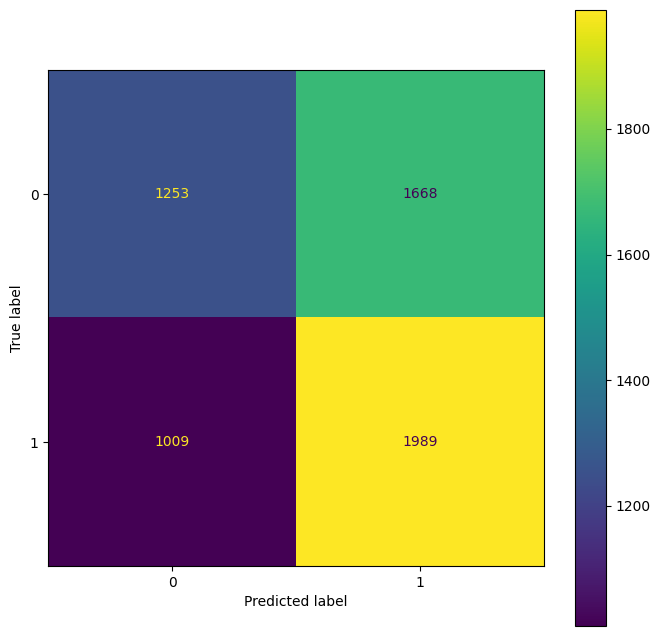

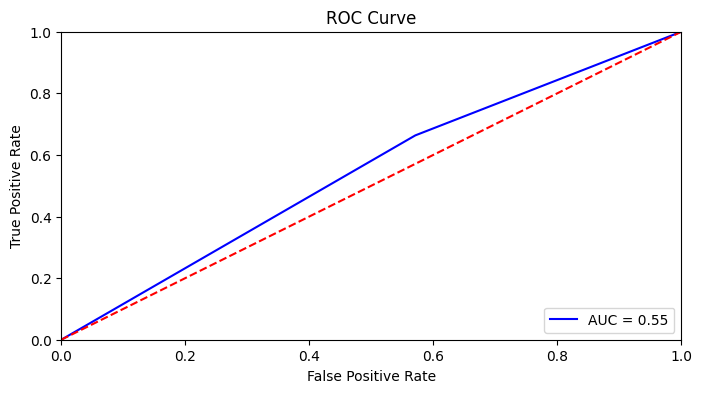

              precision    recall  f1-score   support

           0       0.55      0.43      0.48      2921
           1       0.54      0.66      0.60      2998

    accuracy                           0.55      5919
   macro avg       0.55      0.55      0.54      5919
weighted avg       0.55      0.55      0.54      5919



In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD

nb = Pipeline([
    ('svd', TruncatedSVD()),
    ('nb', GaussianNB())
])

param_grid = {
    'svd__n_components': [100, 200, 500]
}

best_model = hyperparameter_tuning(nb, param_grid)
results = model_validation(best_model)
print("Cross Validation results", results)
final_model, report = train_model(nb)
print(report)

Κώδικας για Demo

Από τα παραπάνω μοντέλα, μπορούμε να κάνουμε export όποιο από αυτά επιθυμούμε (μαζί με το vectorizer) και να τρέξουμε το τελευταίο κομμάτι αυτής της ανάλυσης ως demo. Προφανώς, το μέγεθος του μοντέλου μπορεί να διαφοροποιείται ανάλογα με το μοντέλο και τις παραμέτρους εκπαίδευσης που θα επιλέξουμε. Στον κώδικα που βρίσκεται στο repo έχει γίνει export το svm μοντέλο με τιμή για την παράμετρο 'C' 0.4 από τα παραδείγματα που υπάρχουν στο jupyter notebook.


In [41]:
import pickle
from joblib import dump, load

final_vectorizer_params = {
    "smooth_idf": True,
    "analyzer": 'word',
    "stop_words": 'english',
    "lowercase": True,
    "ngram_range": (1,2),
    "max_features": 1200
}

tfidf_vectorizer = TfidfVectorizer(**final_vectorizer_params)

tfidf_vectorizer.fit(train_df['text'])

final_model_params = {
    "kernel": 'linear',
    "C": 0.4
}

final_model_svm = SVC(**final_model_params)

final_model_svm.fit(X,y)

SVC(C=0.4, kernel='linear')

Το vectorizer και το model αποθηκεύονται στο φάκελο ‘models’.

In [43]:
# Save Vectorizerto file 
with open('../models/vectorizer_tfidf-os.pickle', 'wb') as fin:
    pickle.dump(tfidf_vectorizer, fin)

# Save Model to file
dump(final_model_svm, '../models/SA_NLP_Model-os.joblib')

['../models/SA_NLP_Model-os.joblib']

Ο παρακάτω κώδικας λειτουργεί ως demo και διαβάζει ένα κείμενο από τα αρχεία review1.txt και review.txt (βρίσκονται στο φάκελο demo) και επιστρέφει ένα prediction για το sentiment του review.

In [44]:
import sys
import pickle
import joblib

def load_model():
    with open(r"../models/vectorizer_tfidf-os.pickle", "rb") as input_file:
        vectorizer = pickle.load(input_file)

    loaded_model = joblib.load('../models/SA_NLP_Model-os.joblib')
    
    return vectorizer, loaded_model

with open('../demo/review1.txt') as f:
     lines = f.readlines()
print('The input text is: ', lines[0])
    
vec, model = load_model()

test_vec = vec.transform(lines)
    
print('The predicted sentiment is:', model.predict(test_vec)[0])

with open('../demo/review.txt') as f:
     lines = f.readlines()
print('The input text is: ', lines[0])

test_vec = vec.transform(lines)
    
print('The predicted sentiment is:', model.predict(test_vec)[0])

The input text is:  You'll have to have your wits about you and your brain fully switched on watching Oppenheimer as it could easily get away from a nonattentive viewer. This is intelligent filmmaking which shows it's audience great respect. It fires dialogue packed with information at a relentless pace and jumps to very different times in Oppenheimer's life continuously through it's 3 hour runtime. There are visual clues to guide the viewer through these times but again you'll have to get to grips with these quite quickly. This relentlessness helps to express the urgency with which the US attacked it's chase for the atomic bomb before Germany could do the same. An absolute career best performance from (the consistenly brilliant) Cillian Murphy anchors the film. This is a nailed on Oscar performance. In fact the whole cast are fantastic (apart maybe for the sometimes overwrought Emily Blunt performance). RDJ is also particularly brilliant in a return to proper acting after his decade o